
# Simple Linear Regression with Sacramento Real Estate Data

![Downtown Sacramento](https://imgur.com/PwEN0f2.jpg)

This is my attempt at honing by EDA skills while practicing to construct simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### Reading in the Sacramento housing dataset

In [54]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [55]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

shd = pd.read_csv(sac_csv)

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### EDA

In [56]:
# Checking dtypes.
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [57]:
# Zip code works better as a string object (categorical) so we will have to convert it.
shd['zip'] = shd['zip'].astype(str)

**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues.

In [58]:
# Summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


It appears that we have some values that are out of place, as there are houses with 0 bedrooms, 0 baths, negative square footage, and negative prices. There are also some bizarre longitudes/latitudes in our data set. A house in Antarctica perhaps?

In [59]:
# Check out the cities. Most cities have very few observations.
shd.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
WEST SACRAMENTO      3
EL DORADO            2
LOOMIS               2
FORESTHILL           1
SLOUGHHOUSE          1
GREENWOOD            1
SHINGLE SPRINGS      1
COOL                 1
DIAMOND SPRINGS      1
WALNUT GROVE         1
PENRYN               1
MEADOW VISTA         1
GARDEN VALLEY        1
MATHER               1
Name: city, dtype: int64

In [60]:
shd.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

What could explain the houses with 0 bedrooms?

In [61]:
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [62]:
shd[shd['beds'] == 0].shape

(108, 12)

Given the large number of houses that have 0 beds, 0 baths and 0 square feet, we can make an assumption that these are plots of land that haven't had anything built on them yet. As a result we will *not* be dropping them.


<br>

What about the houses that are less than 0 dollars?

In [63]:
shd[shd['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


This might be the source of the weird minimum price, square footage, and latitude reading.

Actyally, on second pass, the latitude and logitude readings seem to be completely off.

The state seems to be incorrect too.

<br>

And the houses with negative square footage?

In [64]:
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


Because I'm not entirely sure whethere addresses with no square footage are empty lots or incorrect, I'm going to keep those in the data set.

Since I'm much sure of the 1900 Danbrook Drive entry being incorrect however, I'm going to remove that row.

In [65]:
shd.drop(703, inplace=True)

In [66]:
shd.shape

(984, 12)

In [67]:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376010
75%,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


### Since our goal will be to predict price. Let's pick some variables that we think will qualify as predictors of price in an SLR model. 

In [68]:
shd.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

Beds, baths, and sq__ft. 

Latitude and longitude might play a factor as well because certain coordinates will coincide with neighbourhoods/areas that have higher average real estate prices, though those are more involved.

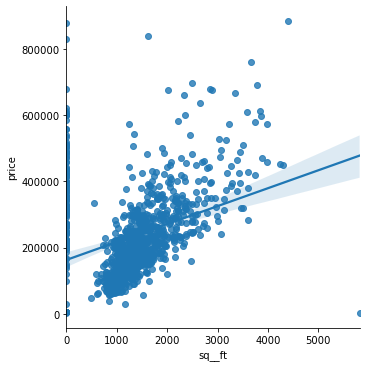

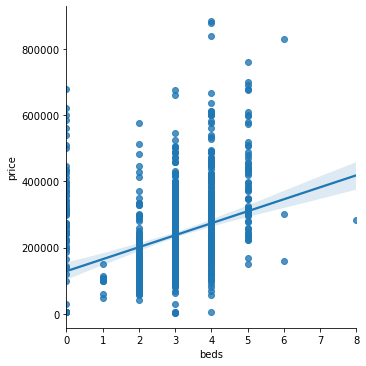

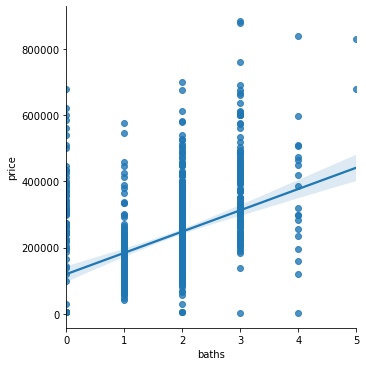

In [69]:
sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

Since we've cleaned our data, let's save it.

In [70]:
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

<br>

It looks like square footage is a better predictor of price than number of beds or baths.

Beds and baths are discrete measures as opposed to square footage, which is a continuous measure.  

Additionally, there are likely strong correlations between the square footage and numbers of bedrooms and bathrooms, in that houses with greater square footage will likely have more bedrooms and bathrooms.

If we dropped all of the plots of land that are in the data set (those with 0 sq ft, beds, and baths), we would see a much stronger trend line in our lm plot.

### Let's build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

In [71]:
import numpy as np
import scipy.stats

# Get the optimal slope and y intercept.

def lin_reg(x,y):
    # Using other libraries for standard deviation and the Pearson correlation coefficient.
    # Note that in SLR, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    # The Pearson correlation coefficient returns a tuple, so it needs to be sliced/indexed.
    # The optimal beta is found by: mean(y) - b1 * mean(x).
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    return beta_0, beta_1

In [72]:
x = shd['sq__ft'].values
y = shd['price'].values
beta0, beta1 = lin_reg(x,y)

#Print the optimal values.
print('The Optimal Y Intercept is ', beta0)
print('The Optimal slope is ', beta1)

The Optimal Y Intercept is  162938.7375609862
The Optimal slope is  54.15619752295772


### According to the above...

For every additional square foot, the price increases by ~$55.17.

A place with no square footage is valued at $161,272.75.

### How can we use this to make a prediction?

A real estate agent with a separate database on house characteristics and locations looking to estimate what price a house will most likely sell for based on the model that we built using this data.

### How can we use this to make an inference?

An architectual company lookingto understand what specific locations and housing characteristics are associated with perceived value. They can tests out their hypotheses about what makes a house valuable with this model.

### Let's calculate and plot the residuals.

In [73]:
# Predictor: y = 162938.74 + 54.16x
# Creating a list of predicted values:

y_pred = beta0 + beta1*x

In [74]:
# Appending the predicted values to the Sacramento housing DataFrame to do DF calcs:
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred:
shd['Residuals'] = abs(shd['price']-shd['Pred'])

In [75]:
shd['Residuals'].mean()
# The mean of our residuals is approximately $96,000, which means that 
# on average our prediction is off by this amount.

95953.5054451103

The mean of our residuals is approximately $96,000, meaning on average our prediction are off by around $96K.

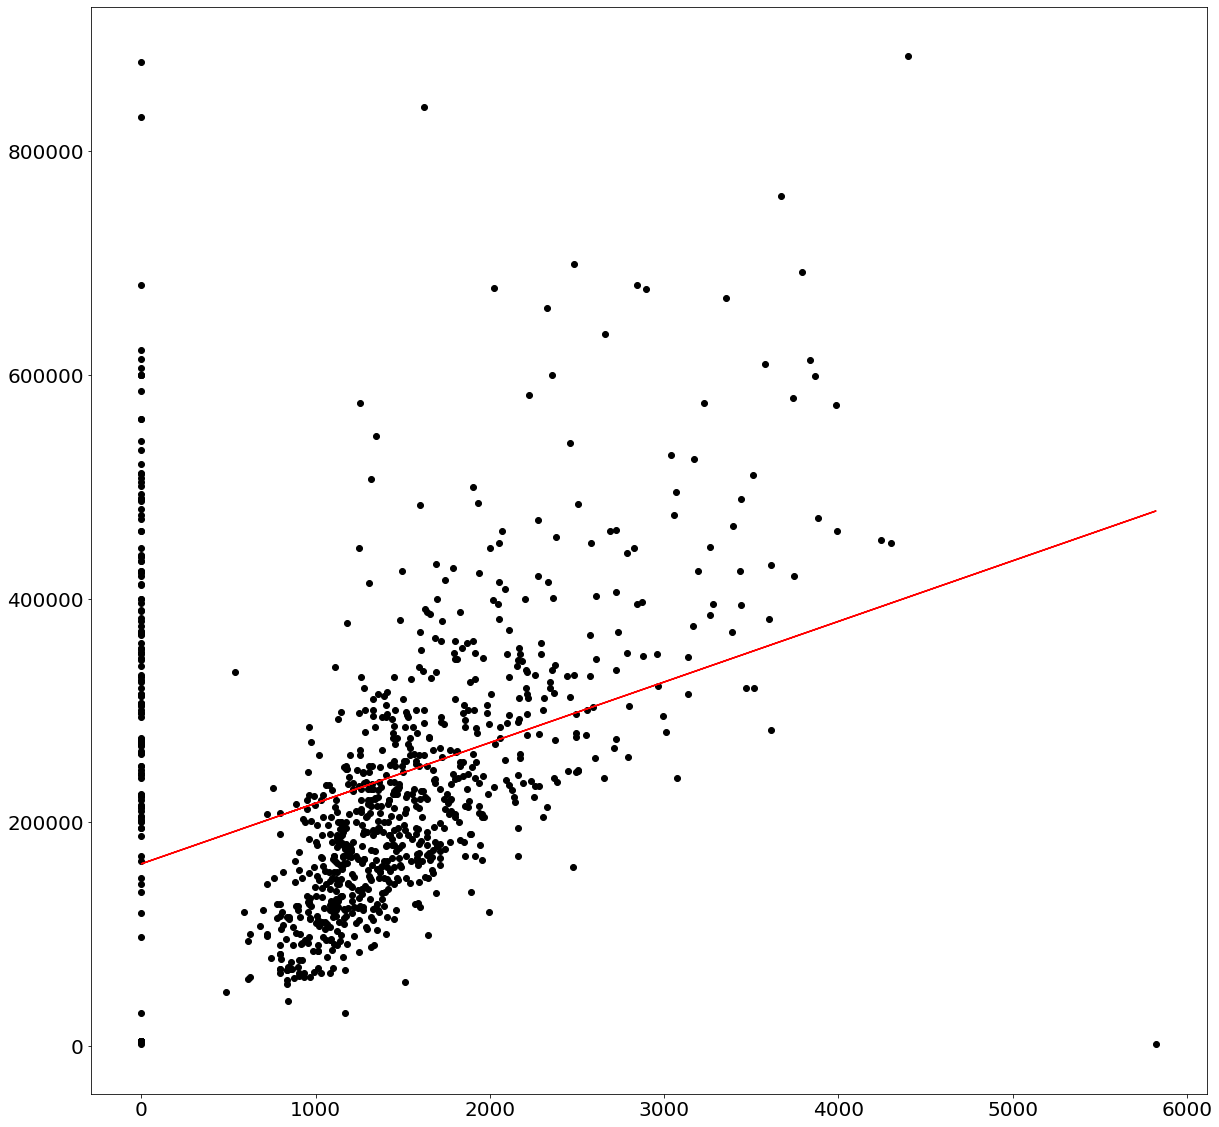

In [76]:
# Plot showing our linear forecast.
fig = plt.figure(figsize=(20,20))

# Change the font size of minor ticks label.
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# Get the axis of that figure.
ax = plt.gca()

# Plot a scatterplot on the axis using our data.
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

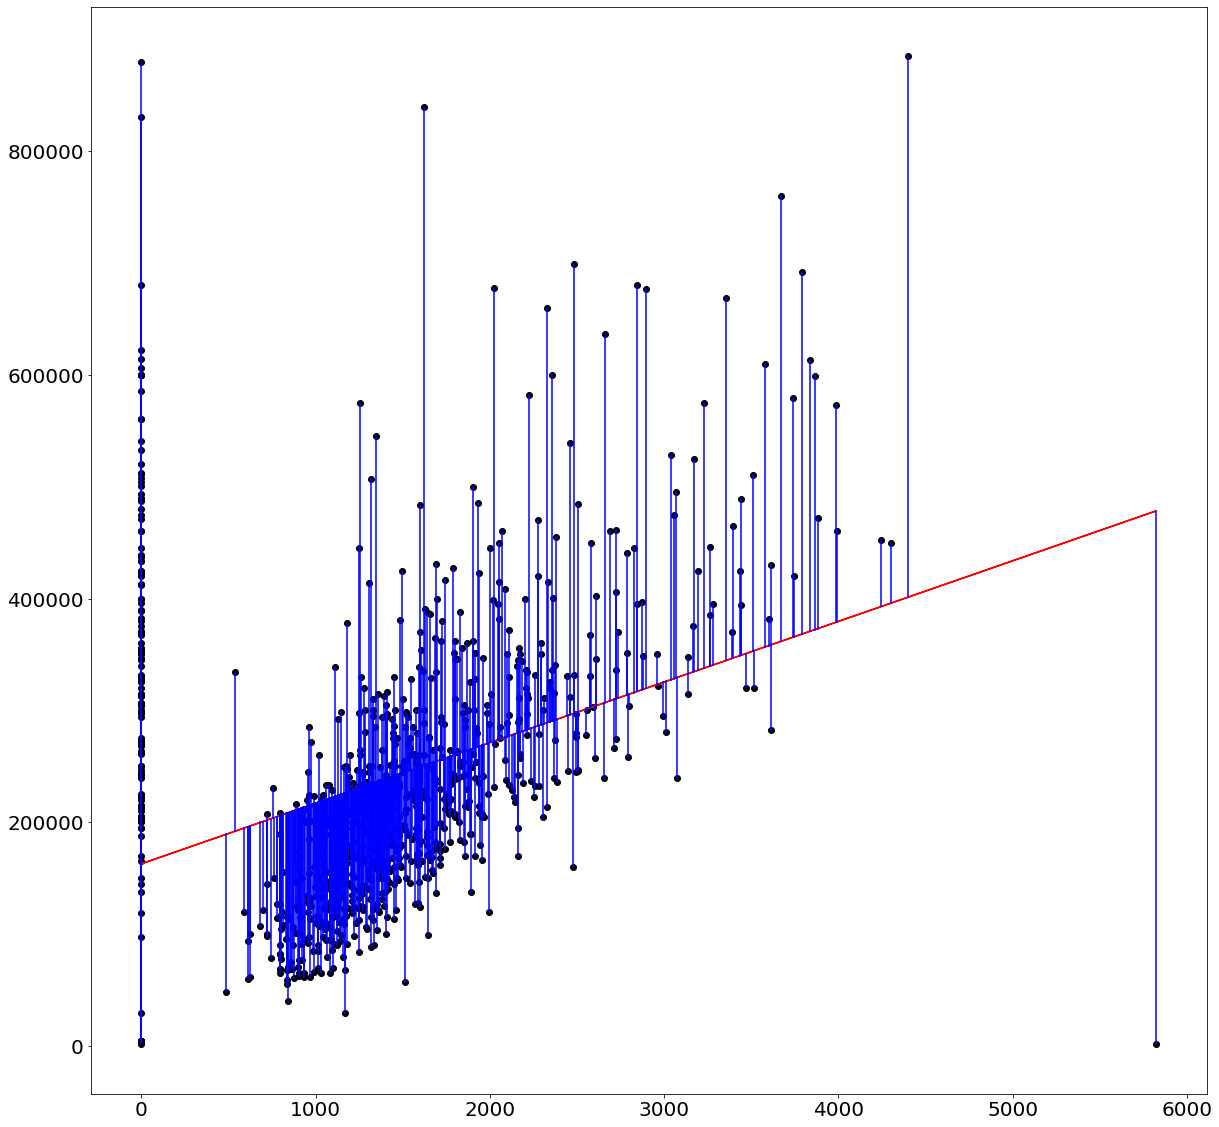

In [77]:
# Plot with residuals.
fig = plt.figure(figsize=(20,20))

# Change the font size of minor ticks label.
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# Get the axis of that figure.
ax = plt.gca()

# Plot a scatterplot on the axis using our data.
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

# Iterate over predictions.
for _, row in shd.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

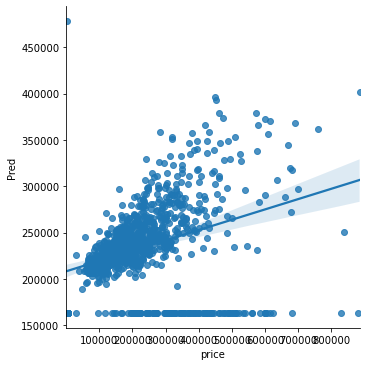

In [78]:
# One more plot; let's look at how our predictions compare to the true values.
sns.lmplot(x='price', y='Pred', data=shd)

Given our last visual, we can see that a lot of points were plotted along the y intercept (y= 162938.74). These were all the houses reported to have a square footage of 0. We could probably create a more insightful model if we removed those observations from our data.

## Dummy Variables!

---

### Let's use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [79]:
shd['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [80]:
type_dummies = pd.get_dummies(shd['type'])

type_dummies.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


### Let's remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [81]:
type_dummies.drop('Unkown', axis=1, inplace=True)

shd = pd.concat([shd, type_dummies], axis=1)

shd.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Pred,Residuals,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,208213.31869,148991.31869,0,0,1


### Let's build a MLR model to predict `price`. 

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [82]:
shd['huge_houses'] = (shd['sq__ft'] > 3775).astype(int)
shd.head()


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Pred,Residuals,Condo,Multi-Family,Residential,huge_houses
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,208213.318690,148991.318690,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,226139.020070,157927.020070,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,206047.070789,137167.070789,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,209079.817851,139772.817851,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,206101.226987,124201.226987,0,0,1,0


In [83]:
shd['huge_houses'].value_counts()

0    974
1     10
Name: huge_houses, dtype: int64

In [84]:
shd['huge_houses'].sum()

10

In [85]:
from sklearn.linear_model import LinearRegression

X = shd[['sq__ft','beds','baths','huge_houses']].values
y = shd['price'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

### Plotting true price vs  predicted price to evaluate our MLR visually.

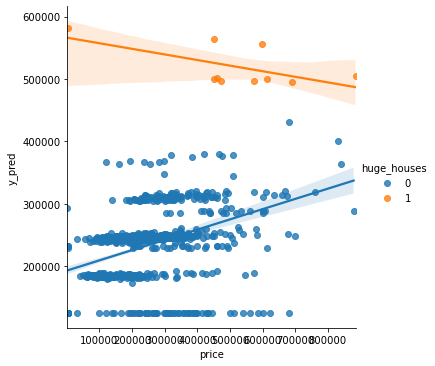

In [86]:
shd['y_pred'] = y_pred
sns.lmplot(x='price', y='y_pred', data=shd, hue='huge_houses');

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





1. Our model's errors don't follow a normal distribution because the places with no square footage are skewing things.

2. The aforementioned places are also causing issues with linearity. 

### Let's generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

In [87]:
import statsmodels.api as sm

X = shd[['sq__ft', 'beds', 'baths', 'huge_houses']]
X = sm.add_constant(X) #only do for statsmodels; creates a new column for a constant value of 1 
y = shd['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     58.99
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.19e-44
Time:                        12:22:42   Log-Likelihood:                -12938.
No. Observations:                 984   AIC:                         2.589e+04
Df Residuals:                     979   BIC:                         2.591e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.251e+05   9766.956     12.811      0.000    1.06e+05    1.44e+05
sq__ft          9.4257      6.991      1.348      0.178      -4.293      23.144
beds        -3898.9895   5966.047     -0.654      0.514   -1.56e+04    7808.722
baths        5.977e+04   8405.687      7.110      0.000    4.33e+04    7.63e+04
huge_houses  1.748e+05   4.29e+04      4.074      0.000    9.06e+04    2.59e+05
==============================================================================
Omnibus:                      231.522   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.052
Skew:                           1.258   Prob(JB):                    9.82e-120
Kurtosis:                       5.654   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Metrics

How about we implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model?

In [89]:
def r2_adj(y, predictions, total_variables):
    r2 = metrics.r2_score(y, predictions)
    adj_r2 = 1-(1-R2)*(len(y)-1)/(len(y)-total_variables-1)

    return r2_adj

### Metrics, metrics, everywhere...

Now, let's write a function to calculate and print or return six regression metrics.

In [90]:
def regression_metrics(y_true, y_preds, p):
    mae = metrics.mean_absolute_error(y_true, y_preds)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    msle = metrics.mean_squared_log_error(y_true, y_preds)
    r2 = metrics.r2_score(y, y_preds)
    adj_r2 = 1-(1-r2)*(len(y_true)-1)/(len(y_true)-p-1)
                   
    print('Mean absolute error: ', mae)
    print('Mean squared error: ', mse)
    print('Root mean squared error: ', rmse)
    print('Mean squared log error: ', msle)
    print('R-Squared: ', r2)
    print('Adjust R-Squared: ', adj_r2)

In [91]:
def regression_metrics(y, predictions, p):
    mae = metrics.mean_absolute_error(y, predictions)
    mse = metrics.mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    msle = metrics.mean_squared_log_error(y, predictions)
    r2 = metrics.r2_score(y, predictions)
    adj_r2 = 1-(1-r2)*(len(y)-1)/(len(y)-p-1)
                   
    print('Mean absolute error: ', mae)
    print('Mean squared error: ', mse)
    print('Root mean squared error: ', rmse)
    print('Mean squared log error: ', msle)
    print('R-Squared: ', r2)
    print('Adjust R-Squared: ', adj_r2)

In [92]:
regression_metrics(shd['price'], predictions, X.shape[1])

Mean absolute error:  93146.13018587431
Mean squared error:  15426429002.706516
Root mean squared error:  124203.17629878278
Mean squared log error:  0.8485426890448741
R-Squared:  0.19421335759663194
Adjust R-Squared:  0.1900937939851628


### Model Iteration. Can we make this better?

In [94]:
shd['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [95]:
shd.dtypes

street           object
city             object
zip              object
state            object
beds              int64
baths             int64
sq__ft            int64
type             object
sale_date        object
price             int64
latitude        float64
longitude       float64
Pred            float64
Residuals       float64
Condo             uint8
Multi-Family      uint8
Residential       uint8
huge_houses       int64
y_pred          float64
dtype: object

In [96]:
#removing the hugh houses features as well as places with no beds, baths, and square footage

shd = shd.drop(shd[(shd['beds'] == 0) & (shd['baths'] == 0) & (shd['sq__ft'] == 0)].index)

features = ['beds', 'baths', 'sq__ft', 'Condo', 'Multi-Family', 'zip', 'longitude' , 'latitude']
X = shd[features]
y = shd['price']
lm = LinearRegression()


lm = LinearRegression()
lm.fit(X, y)

predictions  =  lm.predict(X)

In [97]:
regression_metrics(shd['price'], predictions, X.shape[1])

Mean absolute error:  71758.12219175295
Mean squared error:  9762815904.603657
Root mean squared error:  98806.9628346285
Mean squared log error:  0.27417045016420494
R-Squared:  0.4237515636148833
Adjust R-Squared:  0.41843439234489377


### Bias vs. Variance. What trade-off is our model making?

In [98]:
# A:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cross_val_score(lm, X_train, y_train, cv = 5).mean()

0.36842070658017534

In [99]:
cross_val_score(lm, X_test, y_test, cv = 5).mean()

0.3572145416527869

High bias but low variance. 